### 本教程适合于有一定编程经验的同学，使用Python3，在Jupyter进行调试开发。

涉及的Python基础包括：

* 变量和函数的定义和使用
* 列表和字典等数据结构的使用
* 条件和循环语句，if、for等
* 模块的导入和使用，import语法

需要安装以下依赖库：

* jupyter - 交互式笔记本
* matplotlib - Python2D绘图库
* jieba － Python中文分词组件
* pillow - Python图像处理库
* wordcloud － Python词云库

### 目标

从海贼王的歌词中提取出关键词，然后生成乔巴形状的云图，最后效果如下：

![乔巴](static/images/tony.png)

**1.准备数据**

a. 事先我已准备好15首海贼王的歌词文本文件, 放在本地的data目录下。

In [1]:
ls data # 使用Linux命令显示data目录下内容 

BON VOYAGE.txt*      free will.txt*       向著阳光.txt*
Jungle P.txt*        memories.txt*        心的地图.txt*
Run!Run!Run!.txt*    share the world.txt* 未来航海.txt*
Shining Ray.txt*     全新世界.txt*        永久指针.txt*
believe.txt*         冒险世界.txt*        疯狂彩虹.txt*


b. 原始数据准备OK后，先实现一个函数循环读取data目录下的所有文件

In [2]:
import os

def read_content(content_path):
    '''
    读取目录下的所有文件并合并成一个内容块返回
    '''
    
    # 初始化内容为空
    content = ''
    
    # 使用os模块的listdir函数枚举文件夹下所有文件
    for f in os.listdir(content_path):

        
        # 拼接文件完整路径
        file_fullpath = os.path.join(content_path, f)
        
        # 判断是否是文件
        if os.path.isfile(file_fullpath): 
            print('loading {}'.format(file_fullpath))
            # 将文件内容进行拼接
            content += open(file_fullpath, 'r').read()
            # 每首歌词之间用换行符分隔
            content += '\n'
    print('done loading')
    return content

In [3]:
# 读取文件夹内容
content = read_content('./data')
print('\n显示内容的前面部分...\n')
print(content[:99])

loading ./data/believe.txt
loading ./data/BON VOYAGE.txt
loading ./data/free will.txt
loading ./data/Jungle P.txt
loading ./data/memories.txt
loading ./data/Run!Run!Run!.txt
loading ./data/share the world.txt
loading ./data/Shining Ray.txt
loading ./data/全新世界.txt
loading ./data/冒险世界.txt
loading ./data/向著阳光.txt
loading ./data/心的地图.txt
loading ./data/未来航海.txt
loading ./data/永久指针.txt
loading ./data/疯狂彩虹.txt
done loading

显示内容的前面部分...

世代传承的意志 时代的浪潮 人的梦想
这些都是无法阻挡的
只要人们继续追求自由的解答
这一切都将永不停止

我只相信着未来 就算有人笑我也无所谓
奔驰的热情让你更耀眼
虽然好刺眼 但我仍要继续凝视



c. 使用jieba提取出关键词

In [4]:
import jieba.analyse

# 这里使用jieba的textrank提取出1000个关键词及其比重
result = jieba.analyse.textrank(content, topK=1000, withWeight=True)

# 生成关键词比重字典
keywords = dict()
for i in result:
    keywords[i[0]] = i[1]
print(keywords)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/5d/mjgsmy7n6vlfrk42v1_jtc7c0000gn/T/jieba.cache
Loading model cost 1.042 seconds.
Prefix dict has been built succesfully.


{'扬起': 0.15365137065823337, '开始': 0.33887155728627016, '解答': 0.0790997113814255, '奇迹': 0.2019238936444467, '留下': 0.15805775202925612, '想像': 0.08987560148767863, '感觉': 0.058819354518174556, '时间': 0.07551208515941268, '天堂': 0.08441183647061005, '无法': 0.287129785071775, '伸出': 0.09256367548351727, '回到': 0.08349124701438736, '背负': 0.14437968256383968, '前路': 0.05312061493282433, '屏息': 0.1531365836936351, '秘密': 0.09965773105020974, '七色': 0.08878413441578677, '朋友': 0.1397662417669881, '初识': 0.0830682006897093, '光芒': 0.13352559090174942, '指示': 0.06934108111132412, '拥有': 0.11544194392460741, '色彩': 0.12409038761092896, '世间': 0.18888249529919593, '欢笑': 0.050377170853215976, '选择': 0.06444326221759296, '沾湿': 0.13352559090174942, '起来': 0.0845180267560427, '经历': 0.12616245714507396, '小时候': 0.044857635061158724, '失去': 0.05236725016973628, '歌唱': 0.09501118261648268, '分享': 0.05812477489419511, '收起': 0.0915149943221848, '誓言': 0.05988821730341018, '我会': 0.057893640349250965, '不变': 0.12622369920668572, '熄灭'

**2.使用wordcloud生成云图**

这里还需要一张底图用于生成云图，这里使用海贼王中乔巴的图片
![乔巴](./static/images/tony_src.png)

In [5]:
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

# 初始化图片
image = Image.open('./images/tony_src.png')
graph = np.array(image)

# 生成云图，这里需要注意的是WordCloud默认不支持中文，所以这里需要加载中文黑体字库
wc = WordCloud(font_path='./fonts/simhei.ttf',
    background_color='white', max_words=1000, mask=graph)
wc.generate_from_frequencies(keywords)
image_color = ImageColorGenerator(graph)

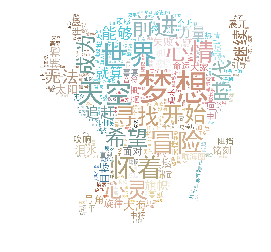